In [1]:
import sys
 
sys.path.insert(0, "../")

from EnsembleFramework import Framework

In [2]:
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.utils import add_self_loops

dataset_name = 'Cora'
split = "public"
dataset = Planetoid(root='/tmp/Cora', name=dataset_name, split=split)
dataset.transform = T.NormalizeFeatures()

features =  dataset[0].x
y =  dataset[0].y

test =  dataset[0].test_mask
train = dataset[0].train_mask
val =  dataset[0].val_mask

edge_index = dataset[0].edge_index 
edge_index = add_self_loops(edge_index)[0]

In [3]:
hops_to_best_configs = {0: {'inter_layer_normalize': True,
  'use_pseudo_attention': True,
  'cosine_eps': 0.005,
  'dropout_attn': 0.0},
 1: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.005,
  'dropout_attn': 0.0},
 2: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.005,
  'dropout_attn': 0.00011111111111111112},
 3: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.005,
  'dropout_attn': 0.00022222222222222223},
 4: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.005,
  'dropout_attn': 0.0},
 5: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.005,
  'dropout_attn': 0.0},
 6: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.005,
  'dropout_attn': 0.0003333333333333334},
 7: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.005,
  'dropout_attn': 0.0},
 8: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.06,
  'dropout_attn': 0.00011111111111111112},
 9: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.06,
  'dropout_attn': 0.00022222222222222223},
 10: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.06,
  'dropout_attn': 0.00011111111111111112},
 15: {'inter_layer_normalize': True,
  'use_pseudo_attention': True,
  'cosine_eps': 0.005,
  'dropout_attn': 0.0},
 20: {'inter_layer_normalize': True,
  'use_pseudo_attention': True,
  'cosine_eps': 0.005,
  'dropout_attn': 0.0},
 30: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.06,
  'dropout_attn': 0.00044444444444444447},
 40: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.06,
  'dropout_attn': 0.0003333333333333334},
 50: {'inter_layer_normalize': False,
  'use_pseudo_attention': True,
  'cosine_eps': 0.06,
  'dropout_attn': 0.0}}

In [4]:
import pandas as pd
import ast

hops_to_best_params_df = pd.read_csv("normalized_origin_features_plus_summed_neighbors.csv")
hops_to_best_params_df = hops_to_best_params_df.sort_values("Unnamed: 0")
evaluated_hops = hops_to_best_params_df.iloc[:,0].values
best_params = hops_to_best_params_df.iloc[:,1].values
hops_to_best_params = dict({hop: ast.literal_eval(best_params[i]) for i, hop in enumerate(evaluated_hops)})
hops_to_best_params

{0: {'C': 17.5365956122971,
  'degree': 2,
  'gamma': 'scale',
  'kernel': 'linear',
  'tol': 0.006861732616659974},
 1: {'C': 99.50472947355532,
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'poly',
  'tol': 0.0002427462273554051},
 2: {'C': 45.40310436626846,
  'degree': 2,
  'gamma': 'scale',
  'kernel': 'rbf',
  'tol': 0.015077832661820122},
 3: {'C': 56.56980378351197,
  'degree': 4,
  'gamma': 'scale',
  'kernel': 'rbf',
  'tol': 0.0008102956897463506},
 4: {'C': 125.56300909127322,
  'degree': 4,
  'gamma': 'scale',
  'kernel': 'rbf',
  'tol': 4.569822781256594e-05},
 5: {'C': 104.8196894499217,
  'degree': 2,
  'gamma': 'scale',
  'kernel': 'rbf',
  'tol': 3.7119311520228275e-05},
 6: {'C': 2.104612736327283,
  'degree': 2,
  'gamma': 'scale',
  'kernel': 'poly',
  'tol': 0.0001053012096432549},
 7: {'C': 2.715982239920301,
  'degree': 2,
  'gamma': 'scale',
  'kernel': 'rbf',
  'tol': 0.0401079757097845},
 8: {'C': 68.6461625884557,
  'degree': 4,
  'gamma': 'scale',
  'kerne

In [5]:
import os
TEST_FILE_PATH = "../test_scores.csv"
VAL_FILE_PATH = "../val_scores.csv"
TRAIN_TIMES_FILE_PATH = "../train_times.csv"
test_scores_df = pd.read_csv(TEST_FILE_PATH) if os.path.isfile(TEST_FILE_PATH) else pd.DataFrame()
val_scores_df = pd.read_csv(VAL_FILE_PATH) if os.path.isfile(VAL_FILE_PATH) else pd.DataFrame()
train_times_df = pd.read_csv(TRAIN_TIMES_FILE_PATH) if os.path.isfile(TRAIN_TIMES_FILE_PATH) else pd.DataFrame()

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(scores):
    node_labels = y.cpu().numpy()
    num_classes = len(set(node_labels))
    
    t_sne_embeddings = TSNE(n_components=2, perplexity=30, method='barnes_hut').fit_transform(scores)
    
    fig = plt.figure(figsize=(12,8), dpi=80)  # otherwise plots are really small in Jupyter Notebook
    cora_label_to_color_map = {0: "red", 1: "blue", 2: "green", 3: "orange", 4: "yellow", 5: "pink", 6: "gray"}
    for class_id in range(num_classes):
        
        plt.scatter(t_sne_embeddings[node_labels == class_id, 0], t_sne_embeddings[node_labels == class_id, 1], s=20, color=cora_label_to_color_map[class_id], edgecolors='black', linewidths=0.2)
    plt.show()

T-SNE of learned proba with [0]


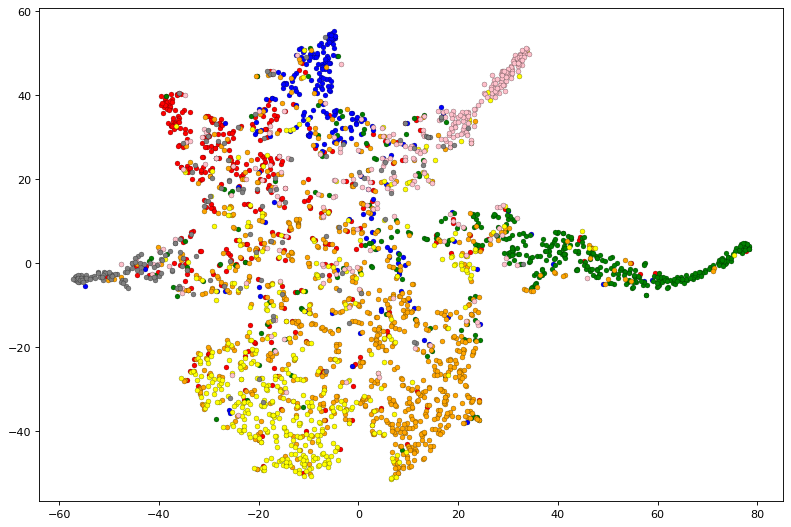

Logistic regression with [0] hops has the following accuracies:
Train acc: 1.0; Val acc 0.588; Test acc 0.599
The required training time was 0.08 s


/home/dwalke/git/graph_aware_ml/svc_classifier/../EnsembleFramework.py:145: UserWarning: The reduce argument of torch.scatter with Tensor src is deprecated and will be removed in a future PyTorch release. Use torch.scatter_reduce instead for more reduction options. (Triggered internally at ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:230.)
  summed_exp_score = torch.zeros_like(exp_score).scatter(0, target,exp_score, reduce="add")


T-SNE of learned proba with [1]


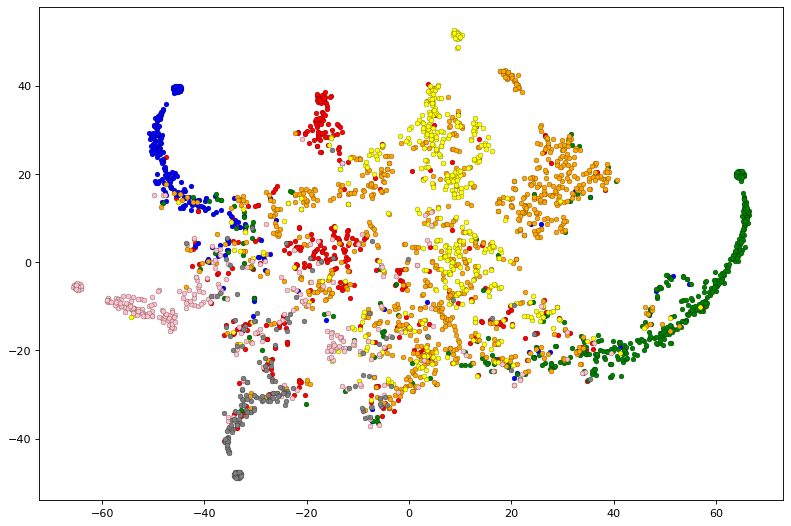

Logistic regression with [1] hops has the following accuracies:
Train acc: 0.8; Val acc 0.664; Test acc 0.684
The required training time was 0.09 s
T-SNE of learned proba with [2]


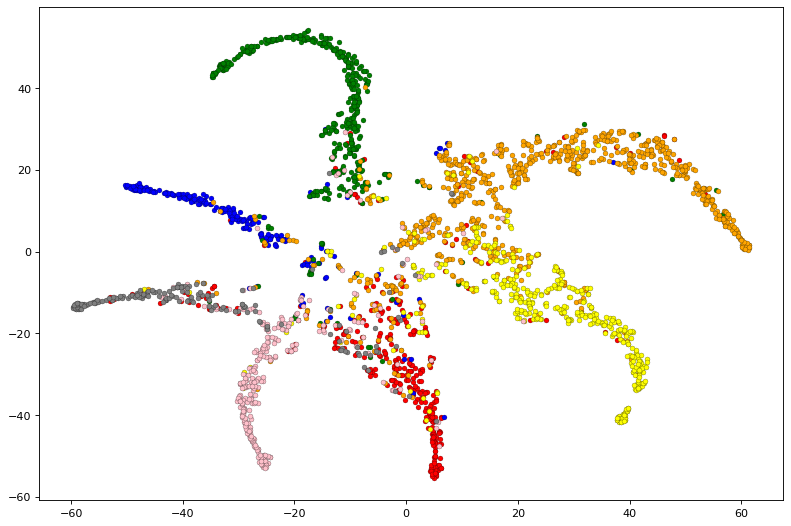

Logistic regression with [2] hops has the following accuracies:
Train acc: 1.0; Val acc 0.786; Test acc 0.792
The required training time was 0.12 s
T-SNE of learned proba with [3]


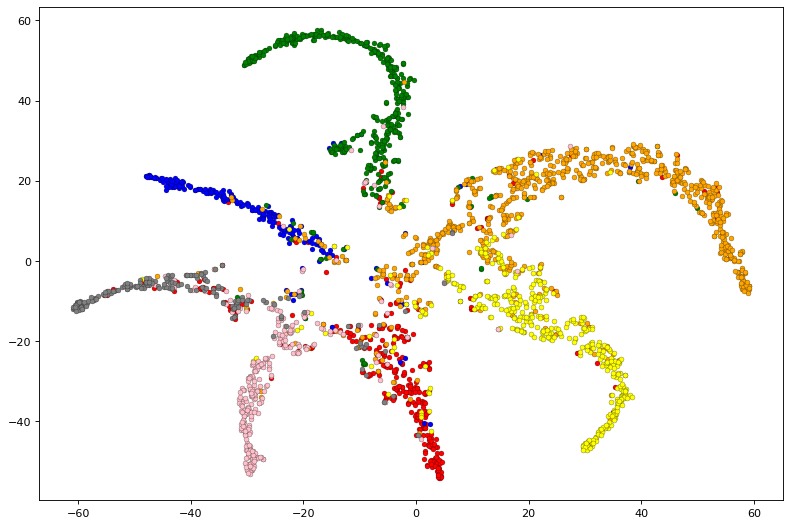

Logistic regression with [3] hops has the following accuracies:
Train acc: 1.0; Val acc 0.804; Test acc 0.822
The required training time was 0.15 s
T-SNE of learned proba with [4]


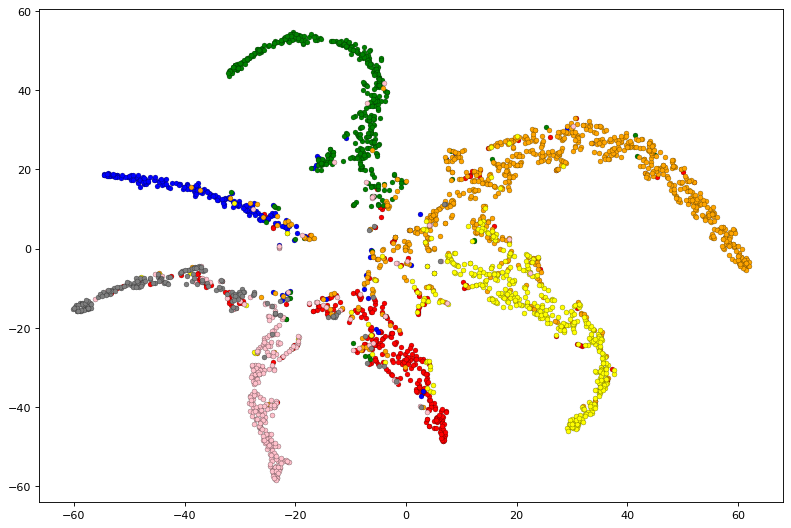

Logistic regression with [4] hops has the following accuracies:
Train acc: 1.0; Val acc 0.81; Test acc 0.822
The required training time was 0.19 s
T-SNE of learned proba with [5]


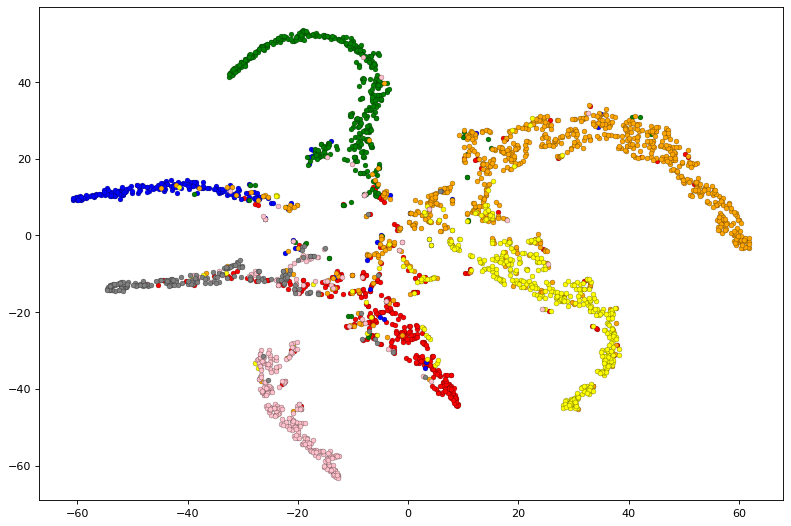

Logistic regression with [5] hops has the following accuracies:
Train acc: 1.0; Val acc 0.812; Test acc 0.82
The required training time was 0.19 s
T-SNE of learned proba with [6]


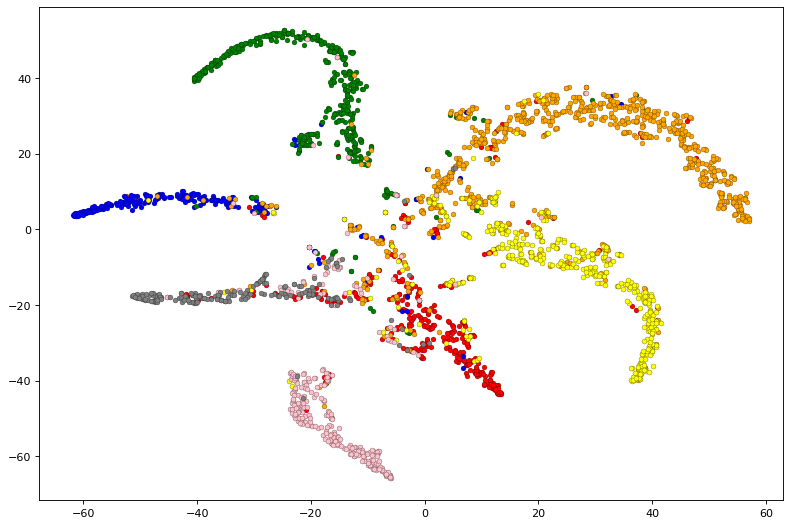

Logistic regression with [6] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.804; Test acc 0.815
The required training time was 0.23 s
T-SNE of learned proba with [7]


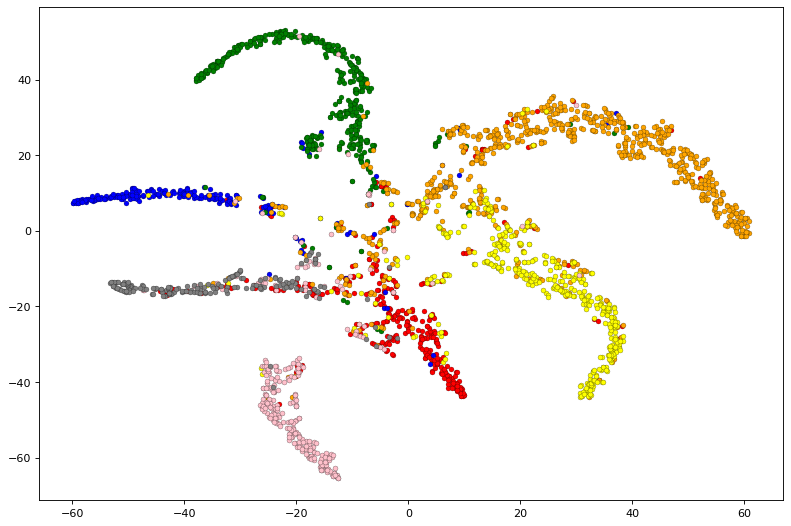

Logistic regression with [7] hops has the following accuracies:
Train acc: 1.0; Val acc 0.812; Test acc 0.822
The required training time was 0.25 s
T-SNE of learned proba with [8]


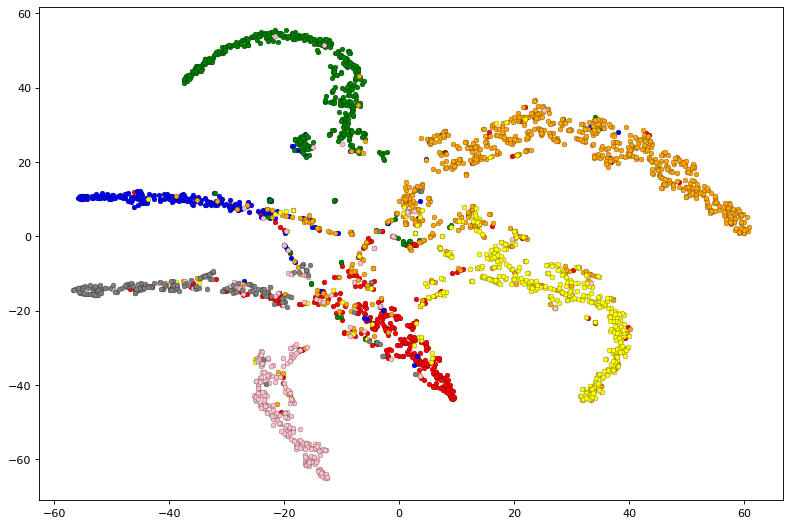

Logistic regression with [8] hops has the following accuracies:
Train acc: 1.0; Val acc 0.806; Test acc 0.814
The required training time was 0.3 s
T-SNE of learned proba with [9]


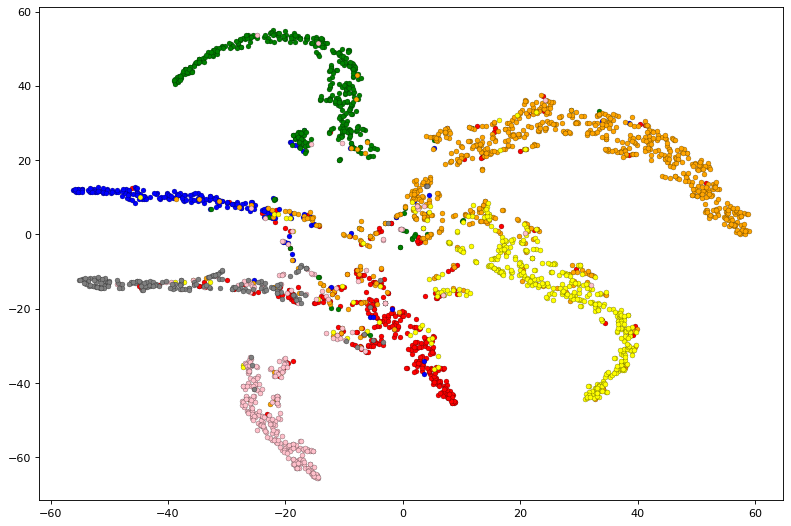

Logistic regression with [9] hops has the following accuracies:
Train acc: 1.0; Val acc 0.806; Test acc 0.814
The required training time was 0.31 s
T-SNE of learned proba with [10]


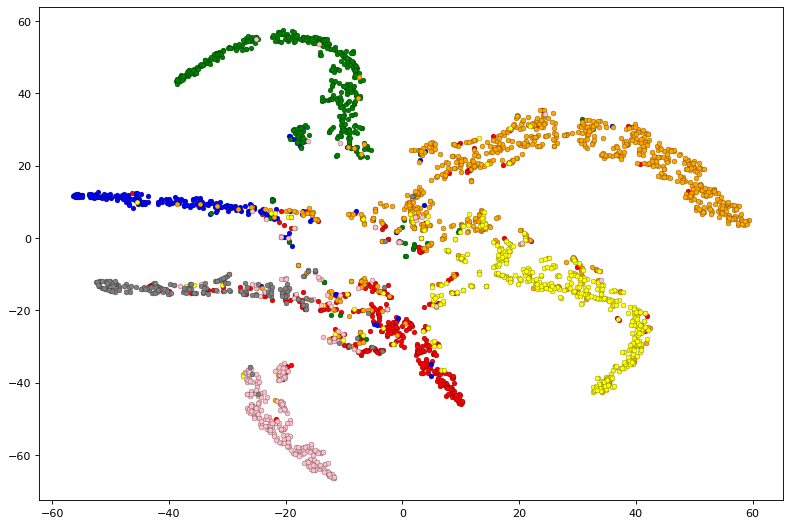

Logistic regression with [10] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.812; Test acc 0.816
The required training time was 0.32 s
T-SNE of learned proba with [15]


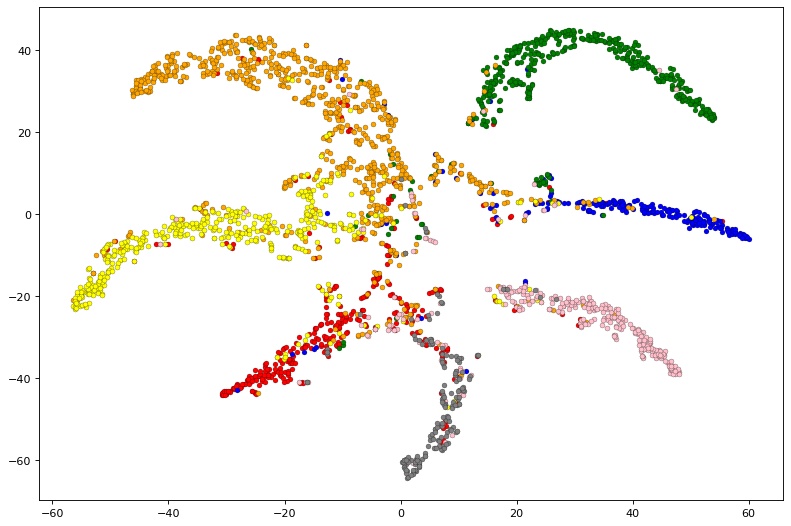

Logistic regression with [15] hops has the following accuracies:
Train acc: 1.0; Val acc 0.79; Test acc 0.813
The required training time was 0.42 s
T-SNE of learned proba with [20]


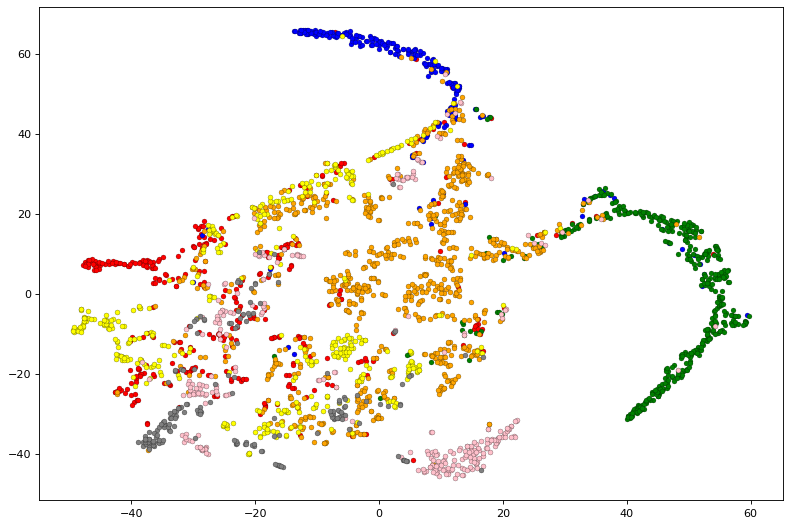

Logistic regression with [20] hops has the following accuracies:
Train acc: 0.5642857142857143; Val acc 0.458; Test acc 0.444
The required training time was 0.55 s
T-SNE of learned proba with [30]


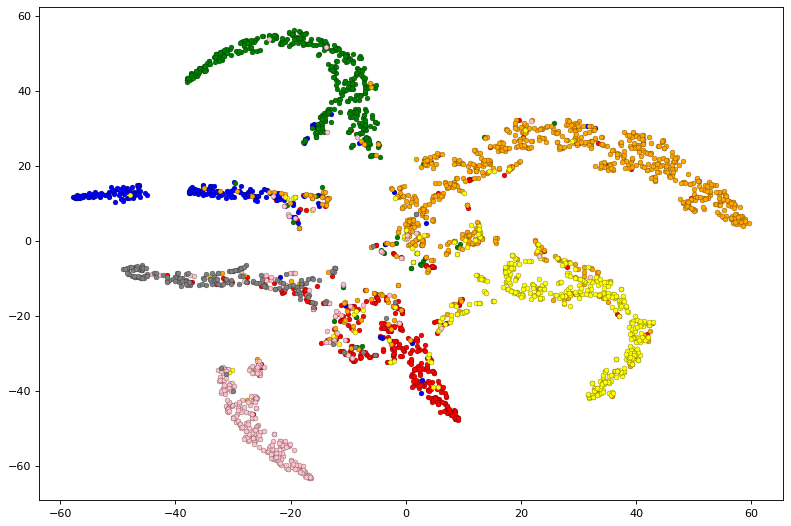

Logistic regression with [30] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.806; Test acc 0.813
The required training time was 0.79 s
T-SNE of learned proba with [40]


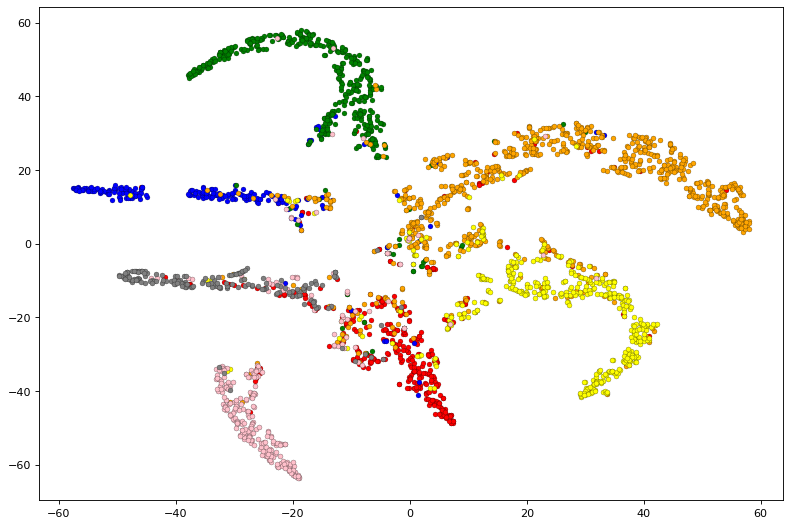

Logistic regression with [40] hops has the following accuracies:
Train acc: 1.0; Val acc 0.808; Test acc 0.816
The required training time was 1.03 s
T-SNE of learned proba with [50]


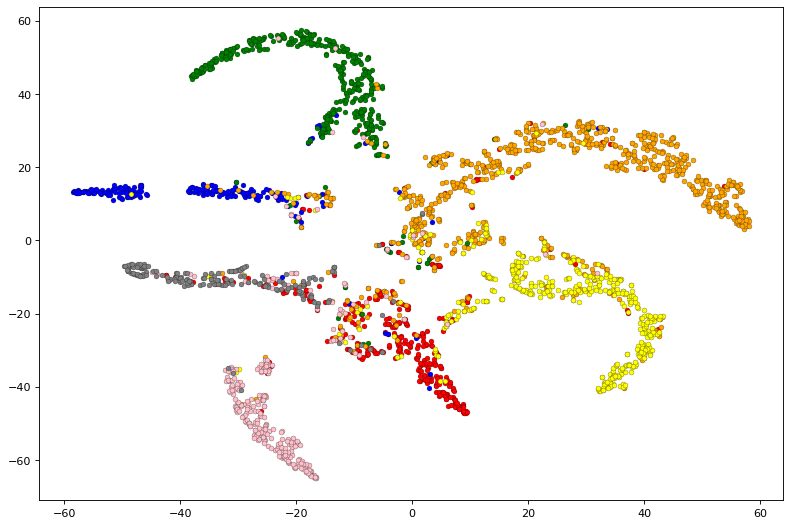

Logistic regression with [50] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.806; Test acc 0.813
The required training time was 1.29 s


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
from torch.nn.functional import normalize, softmax
import torch
import numpy as np

def user_function(kwargs):
    return normalize(kwargs["original_features"] + kwargs["summed_neighbors"], p = 2.0, dim = 1)

hops_lists = np.expand_dims(evaluated_hops, axis = 1) 
val_scores = []
test_scores = []
train_times = []
for hops_list in hops_lists:

    clfs = [
        SVC(**hops_to_best_params[hops], random_state = 42, probability= True) for hops in hops_list
    ]
    framework = Framework([user_function for i in hops_list], 
                         hops_list=hops_list, 
                         clfs=clfs,
                         gpu_idx=0,
                         handle_nan=0.0,
                        attention_configs=[hops_to_best_configs[hop] for hop in hops_list]) 
    new_features = framework.get_features(features, edge_index, torch.ones_like(y).type(torch.bool))
    start = time.time()
    framework.fit(features,
                edge_index,
                y,
                train)
    train_time = time.time()-start
    
    y_pred_val = framework.predict(features,
                    edge_index,
                    val)
    y_pred_test = framework.predict(features,
                    edge_index,
                    test)
    y_pred_train = framework.predict(features,
                    edge_index,
                    train)
    val_score = accuracy_score(y[val], y_pred_val)
    test_score = accuracy_score(y[test], y_pred_test)
    train_score = accuracy_score(y[train], y_pred_train)
    
    val_scores.append(val_score)
    test_scores.append(test_score)
    train_times.append(train_time)
    
    proba = framework.predict_proba(features,
                edge_index,
                 torch.ones_like(y).type(torch.bool))
    print(f"T-SNE of learned proba with {str(hops_list)}")
    plot_tsne(proba)
    print(f"Logistic regression with {str(hops_list)} hops has the following accuracies:\nTrain acc: {str(train_score)}; Val acc {str(val_score)}; Test acc {str(test_score)}")
    print(f"The required training time was {str(round(train_time,2))} s")

In [7]:
assert len(train_times) == len(evaluated_hops.tolist())
assert len(val_scores) == len(evaluated_hops.tolist())
assert len(test_scores) == len(evaluated_hops.tolist())

In [10]:
test_scores_df["hops SVC"] = evaluated_hops
test_scores_df["SVC"] = test_scores

val_scores_df["hops SVC"] = evaluated_hops
val_scores_df["SVC"] = val_scores

train_times_df["hops SVC"] = evaluated_hops
train_times_df["SVC"] = train_times

In [11]:
test_scores_df

,Unnamed: 0,hops LR,Logistic regression,hops SVC,SVC
0,0,0,0.600,0,0.590
1,1,1,0.786,1,0.781
2,2,2,0.819,2,0.817
3,3,3,0.819,3,0.816
4,4,4,0.818,4,0.808
5,5,5,0.822,5,0.810
6,6,6,0.820,6,0.828
7,7,7,0.819,7,0.820
8,8,8,0.814,8,0.823
9,9,9,0.815,9,0.817


In [12]:
test_scores_df.to_csv(TEST_FILE_PATH)
val_scores_df.to_csv(VAL_FILE_PATH)
train_times_df.to_csv(TRAIN_TIMES_FILE_PATH)